In [ ]:
# Left to model

# Inflation adjustments
# Effect of employee turnover
# Firm-specific costs


In [1]:
## Importing data

import pandas as pd
import numpy as np

gradient_shift_ratios = pd.DataFrame({
    'del_mon': [0.000000, 0.000000, 0.142857, 0.142857, 0.428571, 0.714286, 1.000000, 0.714286],
    'del_tue': [0.428571, 0.428571, 0.428571, 0.142857, 0.428571, 0.714286, 1.000000, 0.714286],
    'del_wed': [0.000000, 0.000000, 0.142857, 0.142857, 0.428571, 0.714286, 1.000000, 0.714286],
    'del_thu': [0.428571, 0.428571, 0.428571, 0.142857, 0.428571, 0.714286, 1.000000, 0.714286],
    'del_fri': [0.142857, 0.142857, 0.142857, 0.142857, 0.428571, 0.714286, 1.000000, 1.000000],
    'del_sat': [0.142857, 0.142857, 0.142857, 0.142857, 0.428571, 0.714286, 1.000000, 1.000000],
    'del_sun': [0.142857, 0.142857, 0.142857, 0.142857, 0.428571, 0.714286, 1.000000, 0.714286],
    'sup_mon': [0.333333, 0.333333, 0.666667, 1.000000, 0.666667, 0.333333, 0.000000, -1.000000],
    'sup_tue': [0.333333, 0.333333, 0.666667, 1.000000, 0.666667, 0.333333, 0.000000, -1.000000],
    'sup_wed': [0.333333, 0.333333, 0.666667, 1.000000, 0.666667, 0.333333, 0.000000, -1.000000],
    'sup_thu': [0.333333, 0.333333, 0.666667, 1.000000, 0.666667, 0.333333, 0.000000, -1.000000],
    'sup_fri': [0.333333, 0.333333, 0.666667, 1.000000, 0.666667, 0.666667, 0.666667, -1.000000],
    'sup_sat': [0.333333, 0.333333, 0.666667, 1.000000, 0.666667, 0.666667, 0.666667, -1.000000],
    'sup_sun': [0.333333, 0.333333, 0.666667, 1.000000, 0.666667, 0.666667, 0.333333, -1.000000],
})

bonus = pd.DataFrame({
    'shift': [8, 10, 12, 14, 16, 18, 20, 22],
    'vgl_d_mon': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.25, 1.5],
    'vgl_d_tue': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.25, 1.5],
    'vgl_d_wed': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.25, 1.5],
    'vgl_d_thu': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.25, 1.5],
    'vgl_d_fri': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.25, 1.5],
    'vgl_d_sat': [1.3, 1.3, 1.3, 1.3, 1.3, 1.5, 1.5, 1.5],
    'vgl_d_sun': [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
    'ecom_mon': [1, 1, 1, 1, 1, 1, 1, 1],
    'ecom_tue': [1, 1, 1, 1, 1, 1, 1, 1],
    'ecom_wed': [1, 1, 1, 1, 1, 1, 1, 1],
    'ecom_thu': [1, 1, 1, 1, 1, 1, 1, 1],
    'ecom_fri': [1, 1, 1, 1, 1, 1, 1, 1],
    'ecom_sat': [1, 1, 1, 1, 1, 1, 1, 1],
    'ecom_sun': [1, 1, 1, 1, 1, 1, 1, 1],
    'vgl_s_mon': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5],
    'vgl_s_tue': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5],
    'vgl_s_wed': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5],
    'vgl_s_thu': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5],
    'vgl_s_fri': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5],
    'vgl_s_sat': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5],
    'vgl_s_sun': [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
})

shift_ratio_c2 = pd.DataFrame({
    'shift': [8, 10, 12, 14, 16, 18, 20, 22],
    'del_mon': [1.0, 1.0, 1.2, 1.2, 1.6, 2.0, 2.4, 2.0],
    'del_tue': [1.6, 1.6, 1.6, 1.2, 1.6, 2.0, 2.4, 2.0],
    'del_wed': [1.0, 1.0, 1.2, 1.2, 1.6, 2.0, 2.4, 2.0],
    'del_thu': [1.6, 1.6, 1.6, 1.2, 1.6, 2.0, 2.4, 2.0],
    'del_fri': [1.2, 1.2, 1.2, 1.2, 1.6, 2.0, 2.4, 2.4],
    'del_sat': [1.2, 1.2, 1.2, 1.2, 1.6, 2.0, 2.4, 2.4],
    'del_sun': [1.2, 1.2, 1.2, 1.2, 1.6, 2.0, 2.4, 2.0],
    'sup_mon': [1.333333, 1.333333, 1.666667, 2.000000, 1.666667, 1.333333, 1.000000, 0.000000],
    'sup_tue': [1.333333, 1.333333, 1.666667, 2.000000, 1.666667, 1.333333, 1.000000, 0.000000],
    'sup_wed': [1.333333, 1.333333, 1.666667, 2.000000, 1.666667, 1.333333, 1.000000, 0.000000],
    'sup_thu': [1.333333, 1.333333, 1.666667, 2.000000, 1.666667, 1.333333, 1.000000, 0.000000],
    'sup_fri': [1.333333, 1.333333, 1.666667, 2.000000, 1.666667, 1.666667, 1.000000, 0.000000],
    'sup_sat': [1.333333, 1.333333, 1.666667, 2.000000, 1.666667, 1.666667, 1.666667, 0.000000],
    'sup_sun': [1.333333, 1.333333, 1.666667, 2.000000, 1.666667, 1.666667, 1.333333, 0.000000],
})

wages = pd.DataFrame({
    'wage_group': ['Y_15', 'Y_16', 'Y_17', 'Y_18', 'Y_19', 'Y_20', 'Y_21', 'Y_22'],
    'vgl_s': [3.81, 4.39, 5.02, 5.51, 6.44, 8.61, 10.76, 11.80],
    'ecom': [0.00, 5.23, 5.93, 7.57, 8.08, 9.28, 11.53, 11.53],
    'vgl_d': [3.81, 4.39, 5.02, 5.51, 6.44, 8.61, 10.76, 11.80],
    'ah': [3.66, 4.22, 4.82, 5.29, 6.19, 7.74, 9.68, 11.35],
    'flink': [0.0, 7.4, 7.8, 8.3, 9.5, 11.0, 12.1, 12.1],
    'ah_AI': [4.866702, 5.611334, 6.409154, 7.034113, 8.230843, 10.291878, 12.871496, 15.092095]
})


shift_slots = ['8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24']
weekdays = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
labels_wage_groupings = ['p21', 'p18', 'u18']

## Splitting shift schedule (sup/del)
### Prefixes:
    ### sup = supermarket
    ### del = deliverer

del_ratio = shift_ratio_c2.filter(regex=r'^del_')
sup_ratio = shift_ratio_c2.filter(regex=r'^sup_')
del_ratio.index = shift_slots
sup_ratio.index = shift_slots
bonus.index = shift_slots


## Splitting up bonuses
### Prefixes:
    ### vgl = supermarket CAO
    ### del = deliverer

#vgl_bonus = bonus.filter(regex=r'^vgl_')


## Setting shifts as index & dropping index column

dataset = [wages, bonus, shift_ratio_c2, del_ratio, sup_ratio]

for set in dataset:
    if 'wage_group' in set.columns:
        set.set_index('wage_group', inplace=True)

wages = wages.replace(0, np.nan)


In [2]:
## Grouping wage-groups into 3: -18, 18-20, 21+

CAO_wage_list = wages.columns.tolist()
age_groupings = ['-18', '18-20', '+21']

grouped_wages = pd.DataFrame(index=labels_wage_groupings, columns=CAO_wage_list)

for cao in CAO_wage_list:
    for wg in labels_wage_groupings:
        if wg == 'u18':
            grouped_wages.loc[wg, cao] = wages.loc[['Y_15', 'Y_16', 'Y_17'], cao].mean()
        if wg == 'p18':
            grouped_wages.loc[wg, cao] = wages.loc[['Y_18', 'Y_19', 'Y_20'], cao].mean()
        if wg == 'p21':
            grouped_wages.loc[wg, cao] = wages.loc[['Y_21', 'Y_22'], cao].mean()


In [63]:
grouped_wages = pd.DataFrame(index=labels_wage_groupings, columns=CAO_wage_list)

In [3]:
# Gradient dynamic shifts (more optimized basis)

provider = ['del_', 'sup_']
weekdays = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

del_grad = gradient_shift_ratios.filter(regex=r'^del_')
sup_grad = gradient_shift_ratios.filter(regex=r'^sup_')
del_grad.index = shift_slots
sup_grad.index = shift_slots
del_grad.columns = weekdays
sup_grad.columns = weekdays

del_mingrad = int(input('Min employees to run delivery hub: '))
sup_mingrad = int(input('Min employees to run supermarket: '))
del_maxgrad = int(input('Max employees to run delivery hub: '))
sup_maxgrad = int(input('Max employees to run supermarket: '))

grad_q = {}


for prov in provider:
    prov_grloop = locals()[f'{prov}grad'].copy()
    prov_min = locals()[f'{prov}mingrad']
    prov_max = locals()[f'{prov}maxgrad']
    grad_q[f'{prov}gradq'] = pd.DataFrame(index=shift_slots, columns=weekdays)
    
    for shift in shift_slots:
        for day in weekdays:
            grad_q[f'{prov}gradq'].loc[shift, day] = (prov_grloop.loc[shift, day] * (prov_max - prov_min)) + prov_min
        if shift == '22-24' and prov.startswith('sup_'):
            grad_q[f'{prov}gradq'].loc[shift, :] = 0

del_gradq = grad_q['del_gradq']
sup_gradq = grad_q['sup_gradq']



In [4]:
# Based on gradient quantities, subdividing by age and from age by contract type

contract_type = ['ft', 'pt']
labels_wage_groupings = ['p21', 'p18', 'u18']

p21_del_grad = float(input('Percent of +21 year old deliverers: ')) / 100
u18_del_grad = float(input('Percent of -18 year old deliverers: ')) / 100
p18_del_grad = 1 - p21_del_grad - u18_del_grad

p21_sup_grad = float(input('Percent of +21 year old supermarket employees: ')) / 100
u18_sup_grad = float(input('Percent of -18 year old supermarket employees: ')) / 100
p18_sup_grad = 1 - p21_sup_grad - u18_sup_grad

p21_del_ft = float(input('What share of +21 delivery workers work fulltime? ')) / 100
p18_del_ft = p21_del_ft / 2
u18_del_ft = 0

p21_sup_ft = float(input('What share of +21 supermarket workers work fulltime? ')) / 100
p18_sup_ft = p21_sup_ft / 2
u18_sup_ft = 0

prov_ct_gradq = {}

day_shifts = ['8-10', '10-12', '12-14', '14-16']
night_shifts = ['16-18', '18-20', '20-22', '22-24']

# Indirectly determines total worker quantity
ft_del_daypref = float(input('Fulltime deliverer preference of day shifts % (non excl) ')) / 100
ft_sup_daypref = float(input('Fulltime supermarket worker preference of day shifts % (non excl) ')) / 100


for prov in provider:
    prov_est_sch = grad_q[f'{prov}gradq'].copy()

    for ag in labels_wage_groupings:
        for ct in contract_type:
            if ct == 'ft':
                ct_applied = prov_est_sch * locals()[f'{ag}_{prov}grad'] * locals()[f'{ag}_{prov}ft']
                ft_pref_prov = locals()[f'ft_{prov}daypref']
                
                for time in 'day', 'night':
                    pref_check = locals()[f'{time}_shifts']
                    ftpref_ratio = locals()[f'ft_{prov}daypref'] if time == 'day' else 1 - locals()[f'ft_{prov}daypref']

                    for shift in pref_check:
                        ct_applied.loc[shift] *= ftpref_ratio

            elif ct == 'pt':
                ct_applied = prov_est_sch * locals()[f'{ag}_{prov}grad'] * (1 - locals()[f'{ag}_{prov}ft'])
                ft_pref_prov = 1 - locals()[f'ft_{prov}daypref']

                for time in 'day', 'night':
                        pref_check = locals()[f'{time}_shifts']
                        ftpref_ratio = locals()[f'ft_{prov}daypref'] if time == 'day' else 1 - locals()[f'ft_{prov}daypref']

                        for shift in pref_check:
                            ct_applied.loc[shift] *= ftpref_ratio
            
            
            prov_ct_gradq[f'{ag}_{prov}{ct}'] = ct_applied


p21_del_ft = prov_ct_gradq['p21_del_ft']
p21_del = prov_ct_gradq['p21_del_ft'] + prov_ct_gradq['p21_del_pt']

In [5]:
# Worker quantities amd implicit costs thereof
# Vakbondstientje

# By logic based on ft/pt ratios, non-adjusted

'''
Parameters
- ft = 40h
- pt = XXh (user input)
- vakbondstientje (23*worker count)
'''
# Vary by age group?


del_pt_avg_time = int(input('Average weekly hours of pt delivery worker: '))
sup_pt_avg_time = int(input('Average weekly hours of  pt supermarket worker: '))

workercount_det = pd.DataFrame(index=provider)
workercount_sum = pd.DataFrame(index=provider)

for prov in provider:
    for wg in labels_wage_groupings:
        for ct in contract_type:
            if ct == 'ft': # Set to 40h
                workercount_det.loc[prov, f'{wg}_{ct}'] = (prov_ct_gradq[f'{wg}_{prov}{ct}'].sum().sum() * 2) / 40
            elif ct == 'pt': # User sets average
                workercount_det.loc[prov, f'{wg}_{ct}'] = (prov_ct_gradq[f'{wg}_{prov}{ct}'].sum().sum() * 2) / locals()[f'{prov}pt_avg_time']
            workercount_sum.loc[prov, ct] = workercount_det.loc[prov, [col for col in workercount_det.columns if f'{ct}' in col]].sum()
        workercount_sum.loc[prov, wg] = workercount_det.loc[prov, [col for col in workercount_det.columns if f'{wg}' in col]].sum()

quantity_costs = pd.DataFrame(index=provider) 
for prov in provider:
    for ct in contract_type:
        quantity_costs.loc[prov, 'vakbondstientje'] = workercount_sum.loc[prov, [col for col in workercount_sum.columns if f'{ct}' in col]].sum() * 22.71



In [6]:
## Generating wage group bonus pay matrix 

# (1) Extracting % bonus schemes per CAO
# (2) Creating for every age group and CAO a matrix of % bonus applied to wage 
# (3) Based on prior quantities of workers per age group per store/del, applying bonus scheme wages for those specific hours

### !!! Add the more CAOs to generate as you include more data !!!

# (1)

cao_bonus_ratio = {}
for cao in CAO_wage_list:
    cao_bonus_ratio[cao] = pd.DataFrame(index=shift_slots)
    cao_bonus_ratio[cao] = bonus.filter(regex=f'^{cao}')
    for cao, df in cao_bonus_ratio.items():
        if len(df.columns) == len(weekdays):
            df.columns = weekdays

t_bon_ratio = cao_bonus_ratio['vgl_s']


# (2) CBW

cao_bonus_wage = {}

for cao, df in cao_bonus_ratio.items():
    if len(df.columns) == len(weekdays):
        for age in labels_wage_groupings: 
            wage_brutto = grouped_wages.loc[age, cao] * 2 #Using 2h shift slots
            week_wage_b = df.mul(wage_brutto)
            week_wage_b.index = shift_slots
            week_wage_b.columns = weekdays
            cao_bonus_wage[f"{cao}_{age}"] = week_wage_b



# 3 

# Bind naming conventions of var and labels for age groups
age_bind = {
    '-18': 'u18',
    '18-20': 'p18',
    '+21': 'p21'
}

# Need to account for 2h slots! Double check

cao_prov_age_pq = {}

for prov in provider:
    for cao in CAO_wage_list:
        for ag in labels_wage_groupings:
            for ct in contract_type:
                c_b_w = f"{cao}_{ag}"
                cao_bonus_get = cao_bonus_wage.get(c_b_w, pd.DataFrame())
                if not cao_bonus_get.empty:
                    age_pq = prov_ct_gradq[f'{ag}_{prov}{ct}']
                    cao_prov_age_pq[f"{cao}_{prov}{ag}_{ct}"] = pd.DataFrame(index=shift_slots, columns=weekdays)
                    if ag == 'u18':
                        cao_prov_age_pq[f"{cao}_{prov}{ag}_{ct}"] = age_pq * cao_bonus_get
                    elif ag == 'p18':
                        cao_prov_age_pq[f"{cao}_{prov}{ag}_{ct}"] = age_pq * cao_bonus_get
                    elif ag == 'p21':
                        cao_prov_age_pq[f"{cao}_{prov}{ag}_{ct}"] = age_pq * cao_bonus_get
                continue

test_cao = cao_prov_age_pq['vgl_d_del_u18_pt']
test_cao2 = cao_prov_age_pq['vgl_s_sup_u18_pt']



In [7]:
# Aggregating age groups (q and pq) per age

week_q = {}
week_pq = {}

# Include here if VGL-D the dinner costs

for prov in provider: 
    for cao in CAO_wage_list:
        for ag in labels_wage_groupings:
            wq_fill = f'{prov}{ag}'
            wpq_fill = f'{prov}{cao}_{ag}'
            try: 
                week_q[wq_fill] = prov_ct_gradq[f'{ag}_{prov}ft'] + prov_ct_gradq[f'{ag}_{prov}pt']
                week_pq[wpq_fill] = cao_prov_age_pq[f"{cao}_{prov}{ag}_ft"] + cao_prov_age_pq[f"{cao}_{prov}{ag}_pt"]
            except KeyError:
                continue

In [8]:
test_agepq = prov_ct_gradq['u18_del_pt']
test_cbw = cao_bonus_wage['vgl_d_u18']

test_weekq = week_q['del_u18']
test_weekpq = week_pq['del_vgl_s_p21']

test_weekq2 = week_q['del_p21']


In [9]:
# VGL - Supermarkets implicit costs
vgl_s_pension = 0.1964 # +21 complicated af
vgl_s_franchise = 7.9154
vgl_s_vac_pay = .08 # Total wage costs * 8%
vgl_s_socialfund = 0.0026  # On total wage costs
vgl_s_adv = 0.006075 # ADV normalized across wages
vgl_s_nvacdays = 0.092308  # As if at the end of every week paid vacation is taken

# VGL - Distribution center implicit costs
vgl_d_pension = 0.1964  # +21 complicated af
vgl_d_franchise = 7.9154  # hourly wage not included in pensionable wage
vgl_d_vac_pay = .08 # Total wage costs * 8%
vgl_d_socialfund = 0.0026 # On total wage costs
vgl_d_dinnerpay =  5.45
vgl_d_adv = 0.006075  # ADV normalized across wages
vgl_d_nvacdays = 0.092308  # As if at the end of every week paid vacation is taken

# On top of any wage
# adv
# vac pay
# sociaal fond

# eCom implicit costs

ecom_vac_pay = 0.08
ecom_nvacdays = 0.096153846
ecom_pension = 0
ecom_franchise = 0
ecom_socialfund = 0
ecom_adv = 0
ecom_dinnerpay = 0

imp_cost_source = ['ADV', 'Vac days', 'Vac pay', 'Sociaal fond', 'Pensions', 'Dinner pay', 'Vakbondstientje']

del_pt_factor = del_pt_avg_time / 40
sup_pt_factor = sup_pt_avg_time / 40

detailed_implicit_wagecosts_pac = {}
for prov in provider:
    for cao in CAO_wage_list:
        detailed_implicit_wagecosts_pac[f'{prov}{cao}'] = pd.DataFrame(index=labels_wage_groupings, columns=imp_cost_source)

        adv_cost = 0
        vacd_cost = 0
        vacp_cost = 0
        sf_cost = 0
        pen_cost = 0
        din_cost = 0 

        try:
            nvacpay = locals()[f'{cao}_vac_pay']
            nvacdays = locals()[f'{cao}_nvacdays']
            nadv = locals()[f'{cao}_adv']
            socialfund = locals()[f'{cao}_socialfund']
            pension = locals()[f'{cao}_pension']
            franchise = locals()[f'{cao}_franchise']

            for ag in labels_wage_groupings:    
                    detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, 'ADV'] = week_q[f'{prov}{ag}'].sum().sum() * 2 * grouped_wages.loc[ag, cao] * nadv
                    detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, 'Vac days'] = week_q[f'{prov}{ag}'].sum().sum() * (((1 + nadv) * 2 * grouped_wages.loc[ag, cao]) * nvacdays)
                    detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, 'Vac pay'] = week_q[f'{prov}{ag}'].sum().sum() * ((2 * grouped_wages.loc[ag, cao] * (1 + nadv)) * nvacpay)
                    detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, 'Sociaal fond'] = week_q[f'{prov}{ag}'].sum().sum() * (2 * grouped_wages.loc[ag, cao] * (1 + nadv)) * socialfund
                    detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, 'Vakbondstientje'] = workercount_sum.loc[prov, ag] * (22.71 / 52) # Must adjust part-time factor to it
                    if ag == 'p21':
                        detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, 'Pensions'] = week_q[f'{prov}{ag}'].sum().sum() * ((2 * grouped_wages.loc[ag, cao] * (1 + nadv)) - franchise) * pension
                    if cao == 'vgl_d':
                        detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, 'Dinner pay'] = (week_q[f'{prov}{ag}'].iloc[6, :].sum() * 5.45)
        except KeyError:
            continue



In [11]:
p21_sup_q = week_q['sup_p21'].sum().sum()

del_det_vgl_d = detailed_implicit_wagecosts_pac['del_vgl_d']
del_det_vgl_s = detailed_implicit_wagecosts_pac['del_vgl_s']
del_det_ecom = detailed_implicit_wagecosts_pac['del_ecom']


In [10]:
# Chart inputs

#1 Explicit & implicit weekly costs for all data
## Implicit already done


explicit_week_costs = pd.DataFrame(index=provider, columns=CAO_wage_list)
implicit_week_costs = pd.DataFrame(index=provider, columns=CAO_wage_list)

for prov in provider:
    try:
        for cao in CAO_wage_list:
            exp_temp = 0
            imp_temp = detailed_implicit_wagecosts_pac[f'{prov}{cao}'].sum().sum()
            for ag in labels_wage_groupings:
                exp_temp += week_pq[f'{prov}{cao}_{ag}'].sum().sum()
            explicit_week_costs.loc[prov, cao] = exp_temp
            implicit_week_costs.loc[prov, cao] = imp_temp
    except KeyError:
        continue


#2 Weekly cost by age groups and provider
## Implicit costs already in this format
## Explicit also!


#3
## Real wages/cost per age group and cummulative week cost
## Average weekday cost versus weekend cost
## Average cost of worker during day versus night
# p21_del and such have weekly quantities of workers

## In calculating some implicit costs (weekdays vs weekends) ratio of total was used

descriptive_stats = {}
d_stats = ['Real hourly cost', 'Total week cost', 'Avg weekday cost', 'Avg weekend cost', 'Avg day shift cost', 'Avg night shift cost']

# MUST REVISE SOME COSTS!!!

for prov in provider:
    for cao in CAO_wage_list:
        descriptive_stats[f'{prov}{cao}'] = pd.DataFrame(index=labels_wage_groupings, columns=d_stats)
        for ag in labels_wage_groupings:
            try:
                descriptive_stats[f'{prov}{cao}'].loc[ag, 'Real hourly cost'] = ((week_pq[f'{prov}{cao}_{ag}'].sum().sum() + detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, :].sum()) / 2) / week_q[f'{prov}{ag}'].sum().sum()
                descriptive_stats[f'{prov}{cao}'].loc[ag, 'Total week cost'] = week_pq[f'{prov}{cao}_{ag}'].sum().sum() + detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, :].sum()
                descriptive_stats[f'{prov}{cao}'].loc[ag, 'Avg weekday cost'] = ((week_pq[f'{prov}{cao}_{ag}'].iloc[:, :5].sum().sum() / 5) + detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, :].sum() * (5/7)) / week_q[f'{prov}{ag}'].iloc[:, :5].sum().sum()
                descriptive_stats[f'{prov}{cao}'].loc[ag, 'Avg weekend cost'] = ((week_pq[f'{prov}{cao}_{ag}'].iloc[:, 5:].sum().sum() / 2) + detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, :].sum() * (2/7)) / week_q[f'{prov}{ag}'].iloc[:, 5:].sum().sum()
                descriptive_stats[f'{prov}{cao}'].loc[ag, 'Avg day shift cost'] = ((week_pq[f'{prov}{cao}_{ag}'].iloc[:4, :].sum().sum() / 4) + (detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, :].sum() * (1/2))) / week_q[f'{prov}{ag}'].iloc[:4, :].sum().sum()
                descriptive_stats[f'{prov}{cao}'].loc[ag, 'Avg night shift cost'] = ((week_pq[f'{prov}{cao}_{ag}'].iloc[4:, :].sum().sum() / 4) + (detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc[ag, :].sum() * (1/2))) / week_q[f'{prov}{ag}'].iloc[4:, :].sum().sum()
            except KeyError:
                continue


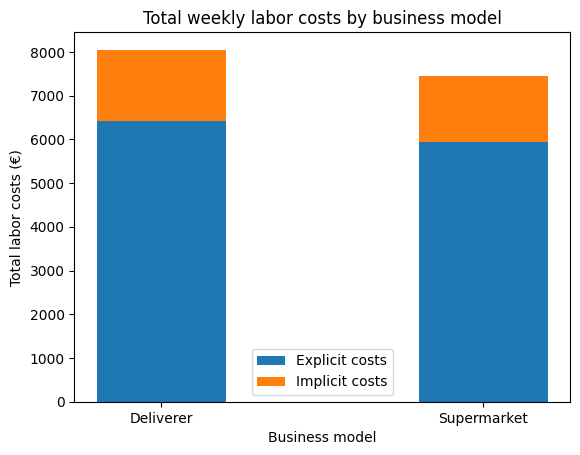

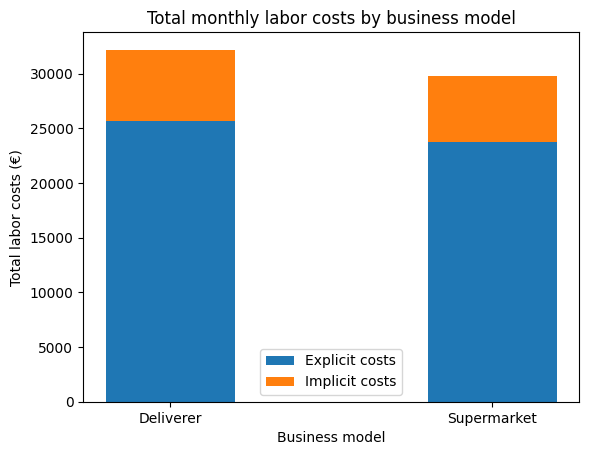

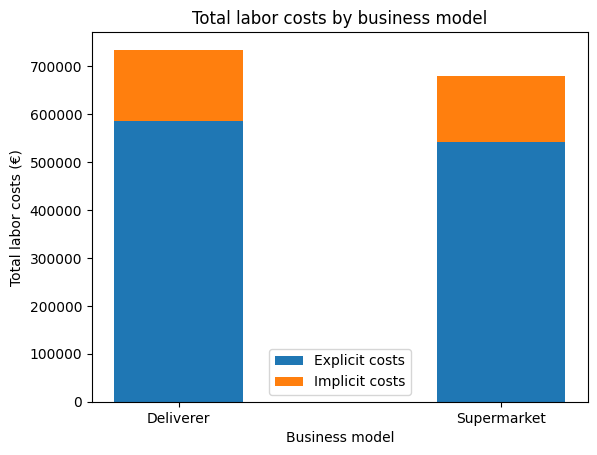

In [11]:
#1 One graph distinguishing between explicit and implicit costs
    ## Shows week, month, year
#2 Another graph breaks down weekly cost composition by age group
#3 Box with mini charts comparing stats:
    ## Average weekly wage by age group
    ## Average weekday cost versus weekend cost
    ## Average cost of worker during day versus night

import numpy as np
import matplotlib.pyplot as plt

# CAOs to compare
del_cao = str(input('Deliverer CAO: '))
sup_cao = str(input('Supermarket CAO: '))
chosen_caos = [del_cao, sup_cao]

del_exp1 = explicit_week_costs.loc['del_', del_cao]
del_imp1 = implicit_week_costs.loc['del_', del_cao]
sup_exp1 = explicit_week_costs.loc['sup_', sup_cao]
sup_imp1 = implicit_week_costs.loc['sup_', sup_cao]

explicit_costw = [del_exp1, sup_exp1]
implicit_costw = [del_imp1, sup_imp1]

explicit_costm = [del_exp1 * 4, sup_exp1 * 4]
implicit_costm = [del_imp1 * 4, sup_imp1 * 4]


#1 Graphs distinguishing between explicit and implicit costs

provlabel = ['Deliverer', 'Supermarket']

b1_w = 0.4
b1_pos = np.arange(len(provlabel))

fig1w, axw = plt.subplots()
axw.bar(provlabel, explicit_costw, b1_w, label='Explicit costs')
axw.bar(provlabel, implicit_costw, b1_w, bottom=explicit_costw, label='Implicit costs')
axw.set_xlabel('Business model')
axw.set_ylabel('Total labor costs (€)')
axw.set_title('Total weekly labor costs by business model')
axw.legend()
plt.show()

fig1m, axm = plt.subplots()
axm.bar(provlabel, explicit_costm, b1_w, label='Explicit costs')
axm.bar(provlabel, implicit_costm, b1_w, bottom=explicit_costm, label='Implicit costs')
axm.set_xlabel('Business model')   
axm.set_ylabel('Total labor costs (€)')
axm.set_title('Total monthly labor costs by business model')
axm.legend()
plt.show()

# Making inflation adjustments

# VGL
# Jun 2022 +2.5% ### 21 weeks from Jan 22
# Mar 2023 +1% ### 38 weeks from Jun 22
# Jul 2023 +1.5% ### 17 weeks from Mar 23
# End 1 October 23 ### 13 weeks from Jul 23

# eCom
# May 2022 +3% ### 17 weeks from Jan 22
# May 2023 +3% ### 52 weeks from May 22
# ### 21 weeks until 1oct23

del_exp_lt = 0
del_imp_lt = 0
sup_exp_lt = 0
sup_imp_lt = 0

for prov in provider:
    expc = locals()[f'{prov}exp1']
    impc = locals()[f'{prov}imp1']
    
    cao = locals()[f'{prov}cao']
    if cao == 'vgl_d' or cao == 'vgl_s':
        locals()[f'{prov}exp_lt'] = (expc * 21) + ((1.025)*expc * 38) + ((1.025)*(1.01)*expc * 17) + ((1.025)*(1.01)*(1.015)*expc * 13)
        locals()[f'{prov}imp_lt'] = (impc * 21) + ((1.025)*impc * 38) + ((1.025)*(1.01)*impc * 17) + ((1.025)*(1.01)*(1.015)*impc * 13)
    elif cao == 'ecom':
        locals()[f'{prov}exp_lt'] = (expc * 17) + ((1.03)*expc * 52) + ((1.03)*(1.03)*expc * 21)
        locals()[f'{prov}imp_lt'] = (impc * 17) + ((1.03)*impc * 52) + ((1.03)*(1.03)*impc * 21)

impl_lt = [del_imp_lt, sup_imp_lt]
expl_lt = [del_exp_lt, sup_exp_lt]

fig1lt, axlt = plt.subplots()
axlt.bar(provlabel, expl_lt, b1_w, label='Explicit costs')
axlt.bar(provlabel, impl_lt, b1_w, bottom=expl_lt, label='Implicit costs')
axlt.set_xlabel('Business model')
axlt.set_ylabel('Total labor costs (€)')
axlt.set_title('Total labor costs by business model')
axlt.legend()
plt.show()


            



C:\Users\pedro\AppData\Local\Temp\ipykernel_12160\5750777.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


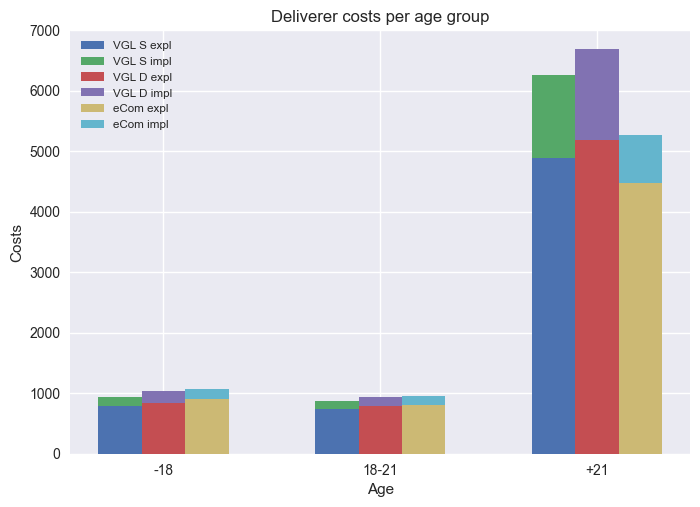

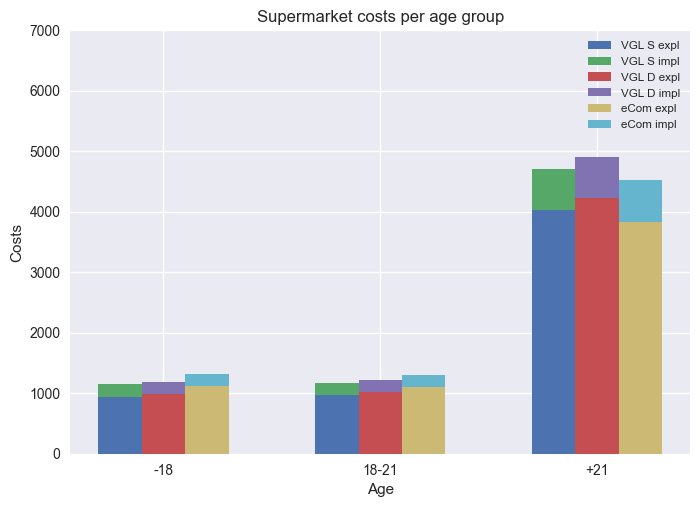

In [12]:

import matplotlib.pyplot as plt

plt.style.use('seaborn')

bars_comp = 0.2
bars_x = np.arange(len(labels_wage_groupings))

del_explt_vgls = [week_pq['del_vgl_s_u18'].sum().sum(), week_pq['del_vgl_s_p18'].sum().sum(), week_pq['del_vgl_s_p21'].sum().sum()]
del_implt_vgls = [detailed_implicit_wagecosts_pac['del_vgl_s'].loc['u18', :].sum().sum(), detailed_implicit_wagecosts_pac['del_vgl_s'].loc['p18', :].sum().sum(), detailed_implicit_wagecosts_pac['del_vgl_s'].loc['p21', :].sum().sum()]

del_explt_vgld = [week_pq['del_vgl_d_u18'].sum().sum(), week_pq['del_vgl_d_p18'].sum().sum(), week_pq['del_vgl_d_p21'].sum().sum()]
del_implt_vgld = [detailed_implicit_wagecosts_pac['del_vgl_d'].loc['u18', :].sum().sum(), detailed_implicit_wagecosts_pac['del_vgl_d'].loc['p18', :].sum().sum(), detailed_implicit_wagecosts_pac['del_vgl_d'].loc['p21', :].sum().sum()]

del_explt_ecom = [week_pq['del_ecom_u18'].sum().sum(), week_pq['del_ecom_p18'].sum().sum(), week_pq['del_ecom_p21'].sum().sum()]
del_implt_ecom = [detailed_implicit_wagecosts_pac['del_ecom'].loc['u18', :].sum().sum(), detailed_implicit_wagecosts_pac['del_ecom'].loc['p18', :].sum().sum(), detailed_implicit_wagecosts_pac['del_ecom'].loc['p21', :].sum().sum()]


sup_explt_vgls = [week_pq['sup_vgl_s_u18'].sum().sum(), week_pq['sup_vgl_s_p18'].sum().sum(), week_pq['sup_vgl_s_p21'].sum().sum()]
sup_implt_costs = [detailed_implicit_wagecosts_pac['sup_vgl_s'].loc['u18', :].sum().sum(), detailed_implicit_wagecosts_pac['sup_vgl_s'].loc['p18', :].sum().sum(), detailed_implicit_wagecosts_pac['sup_vgl_s'].loc['p21', :].sum().sum()]

sup_explt_vgld = [week_pq['sup_vgl_d_u18'].sum().sum(), week_pq['sup_vgl_d_p18'].sum().sum(), week_pq['sup_vgl_d_p21'].sum().sum()]
sup_implt_costs = [detailed_implicit_wagecosts_pac['sup_vgl_d'].loc['u18', :].sum().sum(), detailed_implicit_wagecosts_pac['sup_vgl_d'].loc['p18', :].sum().sum(), detailed_implicit_wagecosts_pac['sup_vgl_d'].loc['p21', :].sum().sum()]

sup_explt_ecom = [week_pq['sup_ecom_u18'].sum().sum(), week_pq['sup_ecom_p18'].sum().sum(), week_pq['sup_ecom_p21'].sum().sum()]
sup_implt_costs = [detailed_implicit_wagecosts_pac['sup_ecom'].loc['u18', :].sum().sum(), detailed_implicit_wagecosts_pac['sup_ecom'].loc['p18', :].sum().sum(), detailed_implicit_wagecosts_pac['sup_ecom'].loc['p21', :].sum().sum()]

###

del_comp_fig, dpf = plt.subplots()
dpf.bar(bars_x, del_explt_vgls, bars_comp, label='VGL S expl')
dpf.bar(bars_x, del_implt_vgls, bars_comp, bottom=del_explt_vgls, label='VGL S impl')

dpf.bar(bars_x + bars_comp, del_explt_vgld, bars_comp, label='VGL D expl')
dpf.bar(bars_x + bars_comp, del_implt_vgld, bars_comp, bottom=del_explt_vgld, label='VGL D impl')

dpf.bar(bars_x + bars_comp * 2, del_explt_ecom, bars_comp, label='eCom expl')
dpf.bar(bars_x + bars_comp * 2, del_implt_ecom, bars_comp, bottom=del_explt_ecom, label='eCom impl')

dpf.set_xlabel('Age')
dpf.set_ylabel('Costs')
dpf.set_title('Deliverer costs per age group')
dpf.legend(fontsize='small')
dpf.set_xticks(bars_x + bars_comp)
dpf.set_xticklabels(['-18', '18-21', '+21'])
dpf.set_ylim(0, 7000)

### Now for supermarket

sup_comp_fig, spf = plt.subplots()
spf.bar(bars_x, sup_explt_vgls, bars_comp, label='VGL S expl')
spf.bar(bars_x, sup_implt_costs, bars_comp, bottom=sup_explt_vgls, label='VGL S impl')

spf.bar(bars_x + bars_comp, sup_explt_vgld, bars_comp, label='VGL D expl')
spf.bar(bars_x + bars_comp, sup_implt_costs, bars_comp, bottom=sup_explt_vgld, label='VGL D impl') 

spf.bar(bars_x + bars_comp * 2, sup_explt_ecom, bars_comp, label='eCom expl')
spf.bar(bars_x + bars_comp * 2, sup_implt_costs, bars_comp, bottom=sup_explt_ecom, label='eCom impl')

spf.set_xlabel('Age')
spf.set_ylabel('Costs')
spf.set_title('Supermarket costs per age group')
spf.legend(fontsize='small')
spf.set_xticks(bars_x + bars_comp)
spf.set_xticklabels(['-18', '18-21', '+21'])
spf.set_ylim(0, 7000)


del_tot_costs = pd.DataFrame(columns=CAO_wage_list)
sup_tot_costs = pd.DataFrame(columns=CAO_wage_list)

for prov in provider:
    tot_list = locals()[f'{prov}tot_costs']
    for cao in CAO_wage_list:
        try:
            tot_list.loc['Explicit', cao] = week_pq[f'{prov}{cao}_u18'].sum().sum() + week_pq[f'{prov}{cao}_p18'].sum().sum() + week_pq[f'{prov}{cao}_p21'].sum().sum()
            tot_list.loc['Implicit', cao] = detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc['u18', :].sum().sum() + detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc['p18', :].sum().sum() + detailed_implicit_wagecosts_pac[f'{prov}{cao}'].loc['p21', :].sum().sum()
        except KeyError:
            continue


In [13]:

#detailed_implicit_wagecosts_pac['del_vgl_d']
#explicit_week_costs.loc[prov, cao]

cost_ratios = pd.DataFrame(index=provider, columns=CAO_wage_list)

for prov in provider:
    for cao in CAO_wage_list:
        cost_ratios[prov, cao] = implicit_week_costs[prov, cao] / explicit_week_costs[prov, cao]

print(cost_ratios)
        

KeyError: ('del_', 'vgl_s')

In [50]:
for prov in provider:
    expc = locals()[f'{prov}exp1']
    impc = locals()[f'{prov}imp1']
    
    cao = locals()[f'{prov}cao']
    if cao == 'vgl_d' or cao == 'vgl_s':
        locals()[f'{prov}exp_lt'] = (expc * 21) + ((1.025)*expc * 38) + ((1.025)*(1.01)*expc * 17) + ((1.025)*(1.01)*(1.015)*expc * 13)
        locals()[f'{prov}imp_lt'] = (impc * 21) + ((1.025)*impc * 38) + ((1.025)*(1.01)*impc * 17) + ((1.025)*(1.01)*(1.015)*impc * 13)
    elif cao == 'ecom':
        locals()[f'{prov}exp_lt'] = (expc * 17) + ((1.03)*expc * 52) + ((1.03)*(1.03)*expc * 21)
        locals()[f'{prov}imp_lt'] = (impc * 17) + ((1.03)*impc * 52) + ((1.03)*(1.03)*impc * 21)



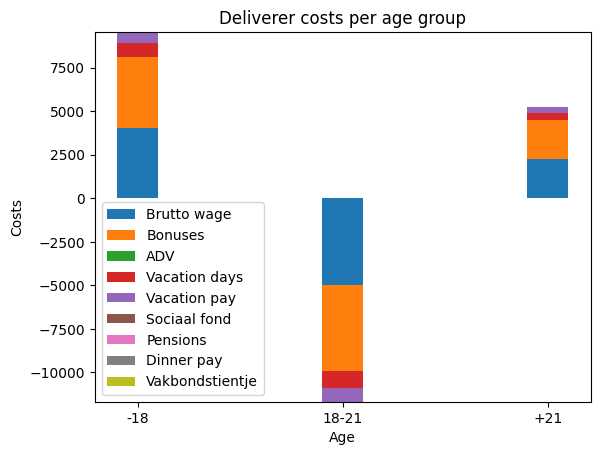

In [14]:
#2 Deliverer weekly cost by age groups and provider

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

b2_w = 0.2
b2_pos = np.arange(len(labels_wage_groupings)) # might be wrong

bar_del_u18 = np.arange(len(labels_wage_groupings))
bar_del_p18 = [i + b2_w for i in bar_del_u18]
bar_del_p21 = [i + b2_w for i in bar_del_p18]

# Individual costs
brut_wage = [week_q['del_u18'].sum().sum() * grouped_wages.loc['u18', f'{del_cao}'], week_q['del_p18'].sum().sum() * grouped_wages.loc['p18', f'{del_cao}'], week_q['del_p21'].sum().sum() * grouped_wages.loc['p21', f'{del_cao}']]
bon_wage = [(week_pq[f'del_{del_cao}_u18'].sum().sum() - (week_q['del_u18'].sum().sum() * grouped_wages.loc['u18', f'{del_cao}'])), (week_pq[f'del_{del_cao}_p18'].sum().sum() - (week_q['del_p18'].sum().sum() * grouped_wages.loc['p18', f'{del_cao}'])), (week_pq[f'del_{del_cao}_p21'].sum().sum() - (week_q['del_p21'].sum().sum() * grouped_wages.loc['p21', f'{del_cao}']))]
adv = [detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['u18', 'ADV'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p18', 'ADV'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p21', 'ADV']]
vacd = [detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['u18', 'Vac days'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p18', 'Vac days'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p21', 'Vac days']]
vacp = [detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['u18', 'Vac pay'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p18', 'Vac pay'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p21', 'Vac pay']]
sf = [detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['u18', 'Sociaal fond'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p18', 'Sociaal fond'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p21', 'Sociaal fond']]
pens = [detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['u18', 'Pensions'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p18', 'Pensions'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p21', 'Pensions']]
dinp = [detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['u18', 'Dinner pay'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p18', 'Dinner pay'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p21', 'Dinner pay']]
vb = [detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['u18', 'Vakbondstientje'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p18', 'Vakbondstientje'], detailed_implicit_wagecosts_pac[f'del_{del_cao}'].loc['p21', 'Vakbondstientje']]

fig2d, axd = plt.subplots()
axd.bar(bar_del_u18, brut_wage, b2_w, label='Brutto wage')
axd.bar(bar_del_u18, bon_wage, b2_w, bottom=brut_wage, label='Bonuses')
axd.bar(bar_del_u18, adv, b2_w, bottom=[i+j for i,j in zip(brut_wage, bon_wage)], label='ADV')
axd.bar(bar_del_u18, vacd, b2_w, bottom=[i+j+k for i,j,k in zip(brut_wage, bon_wage, adv)], label='Vacation days')
axd.bar(bar_del_u18, vacp, b2_w, bottom=[i+j+k+l for i,j,k,l in zip(brut_wage, bon_wage, adv, vacd)], label='Vacation pay')
axd.bar(bar_del_u18, sf, b2_w, bottom=[i+j+k+l+m for i,j,k,l,m in zip(brut_wage, bon_wage, adv, vacd, vacp)], label='Sociaal fond')
axd.bar(bar_del_u18, pens, b2_w, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(brut_wage, bon_wage, adv, vacd, vacp, sf)], label='Pensions')
axd.bar(bar_del_u18, dinp, b2_w, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(brut_wage, bon_wage, adv, vacd, vacp, sf, pens)], label='Dinner pay')
axd.bar(bar_del_u18, vb, b2_w, bottom=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(brut_wage, bon_wage, adv, vacd, vacp, sf, pens, dinp)], label='Vakbondstientje')

axd.set_xlabel('Age')
axd.set_ylabel('Costs')
axd.set_title('Deliverer costs per age group')
axd.legend()
axd.set_xticks(bar_del_u18, ['-18', '18-21', '+21'])
plt.show()



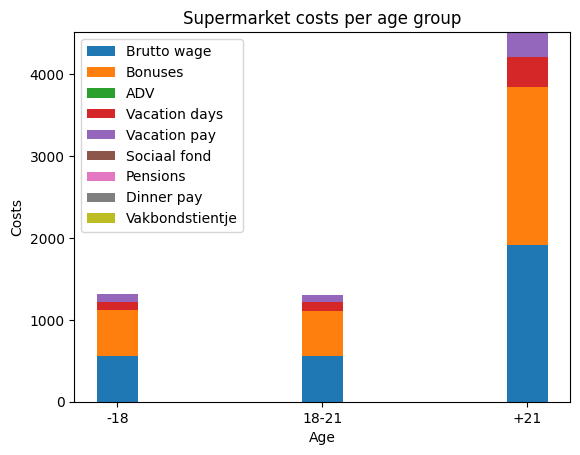

In [16]:
#2 Supermarket weekly cost by age groups and provider

# Now the sup version instead of del

b2_w = 0.2
b2_pos = np.arange(len(labels_wage_groupings)) # might be wrong

bar_sup_u18 = np.arange(len(labels_wage_groupings))
bar_sup_p18 = [i + b2_w for i in bar_sup_u18]
bar_sup_p21 = [i + b2_w for i in bar_sup_p18]

brut_wage = [week_q['sup_u18'].sum().sum() * grouped_wages.loc['u18', f'{sup_cao}'], week_q['sup_p18'].sum().sum() * grouped_wages.loc['p18', f'{sup_cao}'], week_q['sup_p21'].sum().sum() * grouped_wages.loc['p21', f'{sup_cao}']]
bon_wage = [(week_pq[f'sup_{sup_cao}_u18'].sum().sum() - (week_q['sup_u18'].sum().sum() * grouped_wages.loc['u18', f'{sup_cao}'])), (week_pq[f'sup_{sup_cao}_p18'].sum().sum() - (week_q['sup_p18'].sum().sum() * grouped_wages.loc['p18', f'{sup_cao}'])), (week_pq[f'sup_{sup_cao}_p21'].sum().sum() - (week_q['sup_p21'].sum().sum() * grouped_wages.loc['p21', f'{sup_cao}']))]
adv = [detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['u18', 'ADV'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p18', 'ADV'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p21', 'ADV']]
vacd = [detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['u18', 'Vac days'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p18', 'Vac days'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p21', 'Vac days']]
vacp = [detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['u18', 'Vac pay'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p18', 'Vac pay'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p21', 'Vac pay']]
sf = [detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['u18', 'Sociaal fond'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p18', 'Sociaal fond'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p21', 'Sociaal fond']]
pens = [detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['u18', 'Pensions'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p18', 'Pensions'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p21', 'Pensions']]
dinp = [detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['u18', 'Dinner pay'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p18', 'Dinner pay'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p21', 'Dinner pay']]
vb = [detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['u18', 'Vakbondstientje'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p18', 'Vakbondstientje'], detailed_implicit_wagecosts_pac[f'sup_{sup_cao}'].loc['p21', 'Vakbondstientje']]

fig2s, axs = plt.subplots()

axs.bar(bar_sup_u18, brut_wage, b2_w, label='Brutto wage')
axs.bar(bar_sup_u18, bon_wage, b2_w, bottom=brut_wage, label='Bonuses')
axs.bar(bar_sup_u18, adv, b2_w, bottom=[i+j for i,j in zip(brut_wage, bon_wage)], label='ADV')
axs.bar(bar_sup_u18, vacd, b2_w, bottom=[i+j+k for i,j,k in zip(brut_wage, bon_wage, adv)], label='Vacation days')
axs.bar(bar_sup_u18, vacp, b2_w, bottom=[i+j+k+l for i,j,k,l in zip(brut_wage, bon_wage, adv, vacd)], label='Vacation pay')
axs.bar(bar_sup_u18, sf, b2_w, bottom=[i+j+k+l+m for i,j,k,l,m in zip(brut_wage, bon_wage, adv, vacd, vacp)], label='Sociaal fond')
axs.bar(bar_sup_u18, pens, b2_w, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(brut_wage, bon_wage, adv, vacd, vacp, sf)], label='Pensions')
axs.bar(bar_sup_u18, dinp, b2_w, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(brut_wage, bon_wage, adv, vacd, vacp, sf, pens)], label='Dinner pay')
axs.bar(bar_sup_u18, vb, b2_w, bottom=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(brut_wage, bon_wage, adv, vacd, vacp, sf, pens, dinp)], label='Vakbondstientje')
axs.set_xlabel('Age')
axs.set_ylabel('Costs')
axs.set_title('Supermarket costs per age group')
axs.legend()
axs.set_xticks(bar_sup_u18, ['-18', '18-21', '+21'])
plt.show()

In [ ]:
detailed_implicit_wagecosts_pac['del_vgl_d']
explicit_week_costs.loc[prov, cao]

cost_ratios = pd.DataFrame(index=provider, columns=CAO_wage_list)

for prov in provider:
    for cao in CAO_wage_list:
        cost_ratios[prov, cao] = implicit_week_costs[prov, cao] / explicit_week_costs[prov, cao]

print(cost_ratios)

In [ ]:
import 